# Logisitic Regression

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn import cross_validation, feature_selection,preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from patsy import dmatrices


### Titanic Data

La descripción de los datos.

La descripción de la data Titanic

* <b>survival</b>        Sobrevive (0 = No; 1 = Si)
* <b>pclass</b>          Clase de pasajero (1 = Primera clase; 2 = Segunda clase; 3 = Tercera clase)
* <b>name</b>            Nombre
* <b>sex</b>             Género
* <b>age</b>             Edad
* <b>sibsp</b>           Número de hermanos o cónyuges abordo
* <b>parch</b>           Número de padres e hijos abordo
* <b>ticket</b>          Número de tiquete
* <b>fare</b>            Impuesto de tiquete 
* <b>cabin</b>           Cabina
* <b>embarked</b>        Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


### Inputting the data 

In [27]:
df = pd.read_csv('Data/titanic data.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Conteo de los missings

In [28]:
df.count(0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Los campos Cabin, Ticket y Name no agregan valor al análisis asi que lo omitiremos en adelante.

In [30]:
#df=df.drop('Ticket', axis=1, inplace=T)

#df = df.drop('Ticket', axis=1)
#,'Cabin','Name'
# Remove missing values
#df = df.dropna() 

#df

## Model Building

usaremos partición: entrenamiento y test

In [32]:

df_train = df.iloc[ 0: 600, : ]
df_test = df.iloc[ 600: , : ]



Let's build a logisitc regression model using statsmodel

In [33]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked) +  Parch' 

y_train,x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test, return_type='dataframe')

# instantiate our model
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()


Optimization terminated successfully.
         Current function value: 0.464182
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  473
Model:                          Logit   Df Residuals:                      464
Method:                           MLE   Df Model:                            8
Date:                Thu, 09 Mar 2017   Pseudo R-squ.:                  0.3150
Time:                        15:31:42   Log-Likelihood:                -219.56
converged:                       True   LL-Null:                       -320.54
                                        LLR p-value:                 2.467e-39
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            3.7123      0.552      6.720      0.000         2.630     4.795
C(Pclass)[T.2]      -0.8144      0.363     -2.242      0.025        -1.526    -0.102
C(Pclass)[T.3]      -1.9752      0.349     -5.655      0.000        -2.660    -1.291
C(Sex)[T.male]      -2.5689      0.256    -10.034      0.000        -3.071    -2.067
C(Embarked)[T.Q]     0.2204      0.724      0.304      0.761        -1.199     1.639
C(Embarked)[T.S]    -0.2345      0.334     -0.703      0.482        -0.888     0.419
Age                 -0.0354      0.010     -3.598      0.000        -0.055    -0.016
SibSp               -0.3609      0.148     -2.445      0.014        -0.650    -0.072
Parch                0.0311      0.160      0.194      0.846        -0.283     0.346
====================================================================================
"""

Based on the significant variables, let's remodel it

In [34]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp ' 

y_train,x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test, return_type='dataframe')

# instantiate our model
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()


Optimization terminated successfully.
         Current function value: 0.464341
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  474
Model:                          Logit   Df Residuals:                      468
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 Mar 2017   Pseudo R-squ.:                  0.3152
Time:                        15:32:08   Log-Likelihood:                -220.10
converged:                       True   LL-Null:                       -321.42
                                        LLR p-value:                 7.697e-42
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          3.6648      0.516      7.100      0.000         2.653     4.676
C(Pclass)[T.2]    -0.9221      0.339     -2.722      0.006        -1.586    -0.258
C(Pclass)[T.3]    -2.0515      0.328     -6.251      0.000        -2.695    -1.408
C(Sex)[T.male]    -2.5965      0.252    -10.293      0.000        -3.091    -2.102
Age               -0.0365      0.010     -3.750      0.000        -0.056    -0.017
SibSp             -0.3621      0.141     -2.564      0.010        -0.639    -0.085
==================================================================================
"""

Lets see prediction distribution 

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


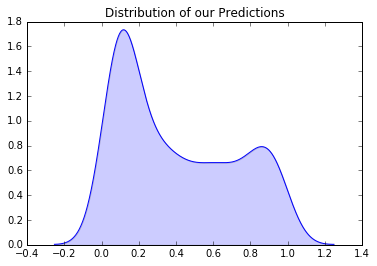

In [8]:
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")

Distribution of prediction based on the Gender

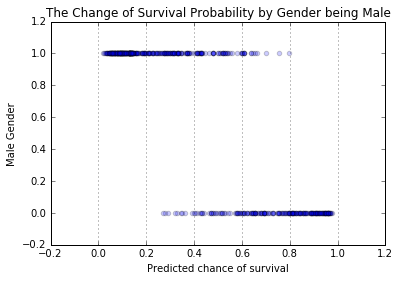

In [9]:
plt.scatter(res.predict(),x_train['C(Sex)[T.male]'] , alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("The Change of Survival Probability by Gender being Male")

Distribution of the prediction based on the lower class

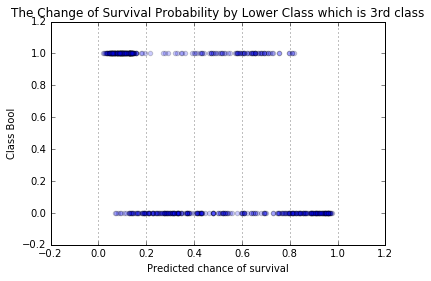

In [10]:
plt.scatter(res.predict(),x_train['C(Pclass)[T.3]'] , alpha=0.2)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class which is 3rd class")

Distribution of prediction based on Age

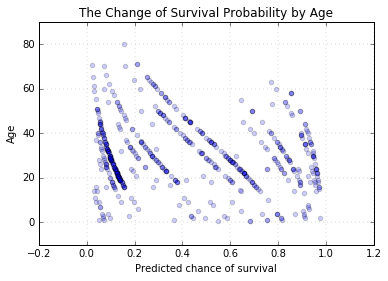

In [11]:
plt.scatter(res.predict(),x_train.Age , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

Distribution of prediction based on number of siblings

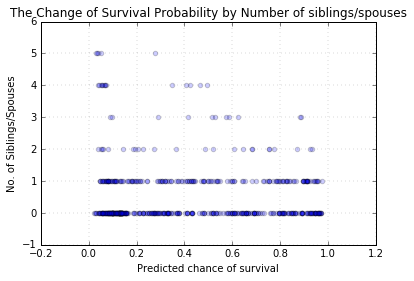

In [12]:
plt.scatter(res.predict(),x_train.SibSp , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Number of siblings/spouses")
plt.xlabel("Predicted chance of survival")
plt.ylabel("No. of Siblings/Spouses")

Let's predict using the model on the test data  and see how is the performance of the model throught the precision and recall by keeping a threshold of 0.7

In [16]:
y_pred = res.predict(x_test)
y_pred_flag = y_pred > 0.7
print (pd.crosstab(y_test.Survived
                  ,y_pred_flag
                  ,rownames = ['Actual']
                  ,colnames = ['Predicted']))

print ('\n \n')

print (classification_report(y_test,y_pred_flag))

Predicted  False  True 
Actual                 
0.0           67      0
1.0           21     24

 

             precision    recall  f1-score   support

        0.0       0.76      1.00      0.86        67
        1.0       1.00      0.53      0.70        45

avg / total       0.86      0.81      0.80       112



Let's compute the receiver operating characteristics

In [182]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.879934


Let's plot the roc curve

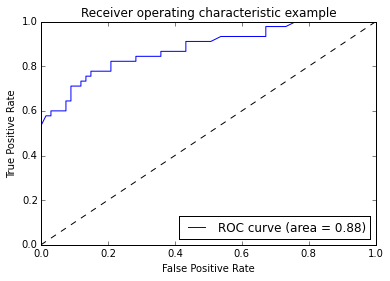

In [183]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Let's build the same model using scikit 

In [188]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x_train, y_train.Survived)


In [185]:
# examine the coefficients
pd.DataFrame(zip(x_train.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[1.67901054914]
1,C(Pclass)[T.2],[-0.941153862481]
2,C(Pclass)[T.3],[-2.13935207654]
3,C(Sex)[T.male],[-2.34378496065]
4,Age,[-0.0314323464392]
5,SibSp,[-0.297688747773]


Let's check out the precision and recall for it

In [206]:
y_pred = model.predict_proba(x_test)
y_pred_flag = y_pred[:,1] > 0.7


print pd.crosstab(y_test.Survived
                  ,y_pred_flag
                  ,rownames = ['Actual']
                  ,colnames = ['Predicted'])

print '\n \n'

print classification_report(y_test,y_pred_flag)

Predicted  False  True 
Actual                 
0             67      0
1             23     22

 

             precision    recall  f1-score   support

        0.0       0.74      1.00      0.85        67
        1.0       1.00      0.49      0.66        45

avg / total       0.85      0.79      0.77       112



Let's compute the roc curve

In [207]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.878275


Let's plot the roc curve

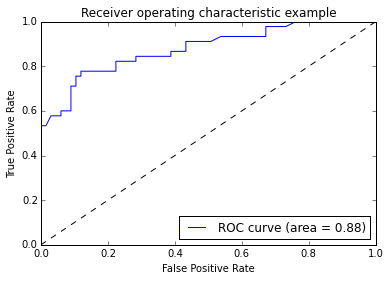

In [208]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()